In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
labels_csv = pd.read_csv("C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


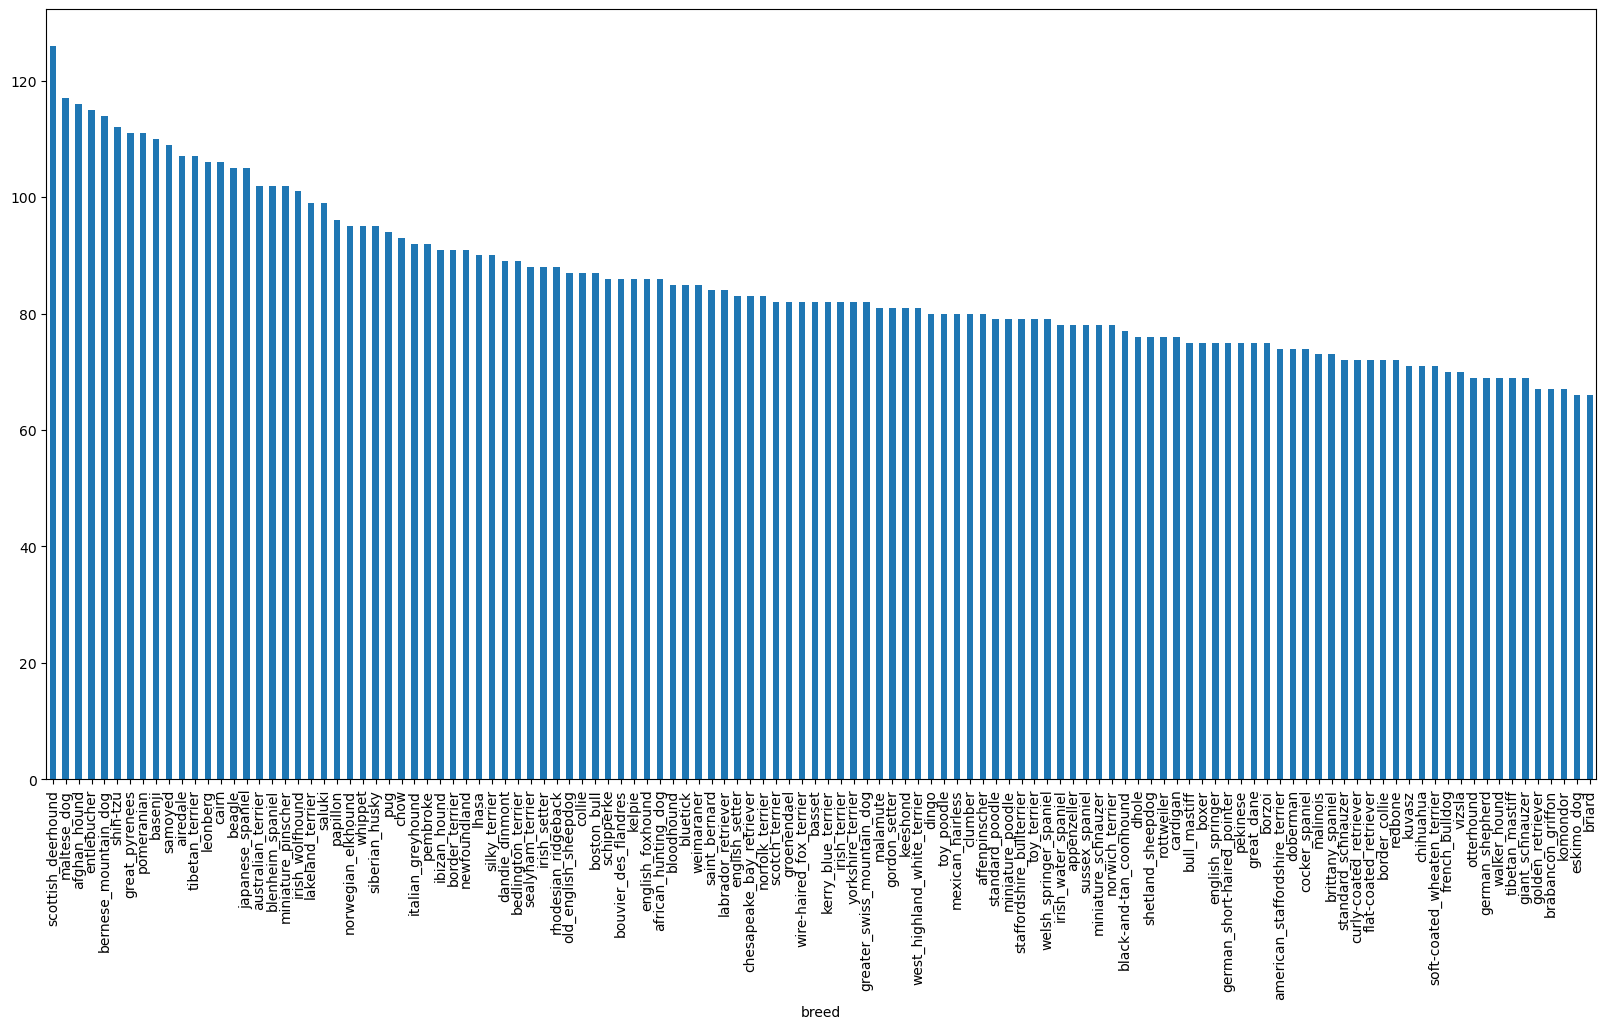

In [4]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));


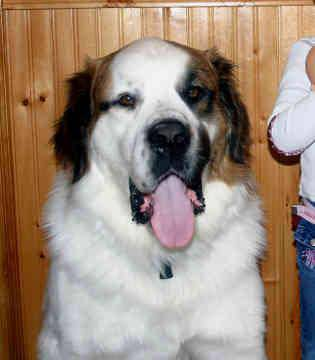

In [5]:
from IPython.display import display, Image
Image("C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\fd80cac3ffdcd6ddcfe4d2d6f8f617f2.jpg")




In [6]:
# Defining traning path
train_path = "C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\"

In [7]:
# Create pathnames from image ID's
filenames = [train_path + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:20]

['C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\001cdf01b096e06d78e9e5112d419397.jpg',
 'C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\002a283a315af96eaea0e28e7163b21b.jpg',
 'C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\0042188c895a2f14ef64a918ed9c7b64.jpg',
 'C:\\Users\\Rishav\\Desktop\\

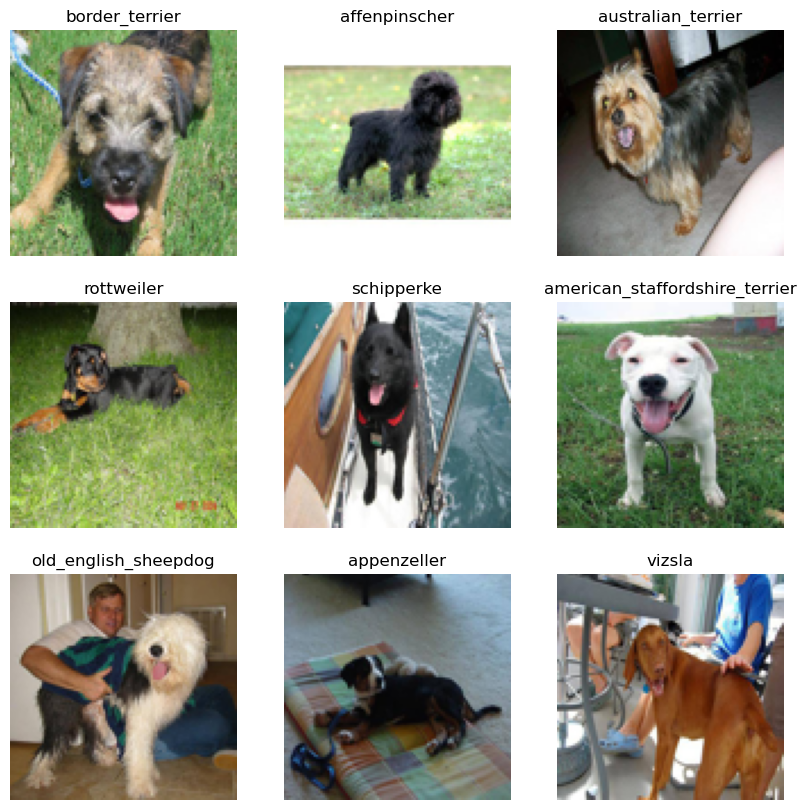

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
import random


random_images = random.sample(filenames, 9)


fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    
    img_path = random_images[i]
    img = Image.open(img_path)
    label = labels_csv[labels_csv["id"] == os.path.splitext(os.path.basename(img_path))[0]]["breed"].values[0]
    
    img = img.resize((100, 100))
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")


plt.show()


In [9]:
import numpy as np
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:20]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound', 'shetland_sheepdog', 'walker_hound',
       'maltese_dog', 'bluetick', 'norfolk_terrier',
       'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone',
       'lakeland_terrier', 'boxer'], dtype=object)

In [10]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [11]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [12]:
print(labels[1]) 
print(np.where(unique_breeds == labels[1])[0][0]) 
print(boolean_labels[1].argmax()) 
print(boolean_labels[0].astype(int)) 

dingo
37
37
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [13]:
# Setup X & y variables
X = filenames
y = boolean_labels

print(f"Number of training images: {len(X)}")
print(f"Number of labels: {len(y)}")

Number of training images: 10222
Number of labels: 10222


In [14]:
import pandas as pd

# Setup X & y variables
X = filenames
y = [np.where(label)[0][0] for label in boolean_labels]

# Create a DataFrame
train_df = pd.DataFrame({'image': X, 'label': y})

# Display the DataFrame
train_df.sample(10)

,image,label
2132,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,72
411,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,3
10184,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,14
2764,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,11
1525,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,86
1386,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,58
636,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,119
3551,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,53
9411,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,46
6190,C:\Users\Rishav\Desktop\DL_dataset\dataset\tra...,71


In [15]:
list(train_df.iloc[1])

['C:\\Users\\Rishav\\Desktop\\DL_dataset\\dataset\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 37]

In [16]:
import tensorflow as tf
refactor_size = 64
resized_image_list = []
all_paths = []

# Loop through the DataFrame to load and process images
for i in range(len(train_df)):
    image_path = train_df.iloc[i]['image']
    label = train_df.iloc[i]['label']

    # Load and process the image
    img = tf.keras.utils.load_img(image_path, target_size=(refactor_size, refactor_size))
    img_vals = tf.image.convert_image_dtype(img, tf.float32)
    imgarr = tf.keras.utils.img_to_array(img_vals)

    # Append the processed image and label to the lists
    resized_image_list.append(imgarr)
    all_paths.append(image_path)

# Convert the lists to numpy arrays
resized_image_list = np.asarray(resized_image_list)

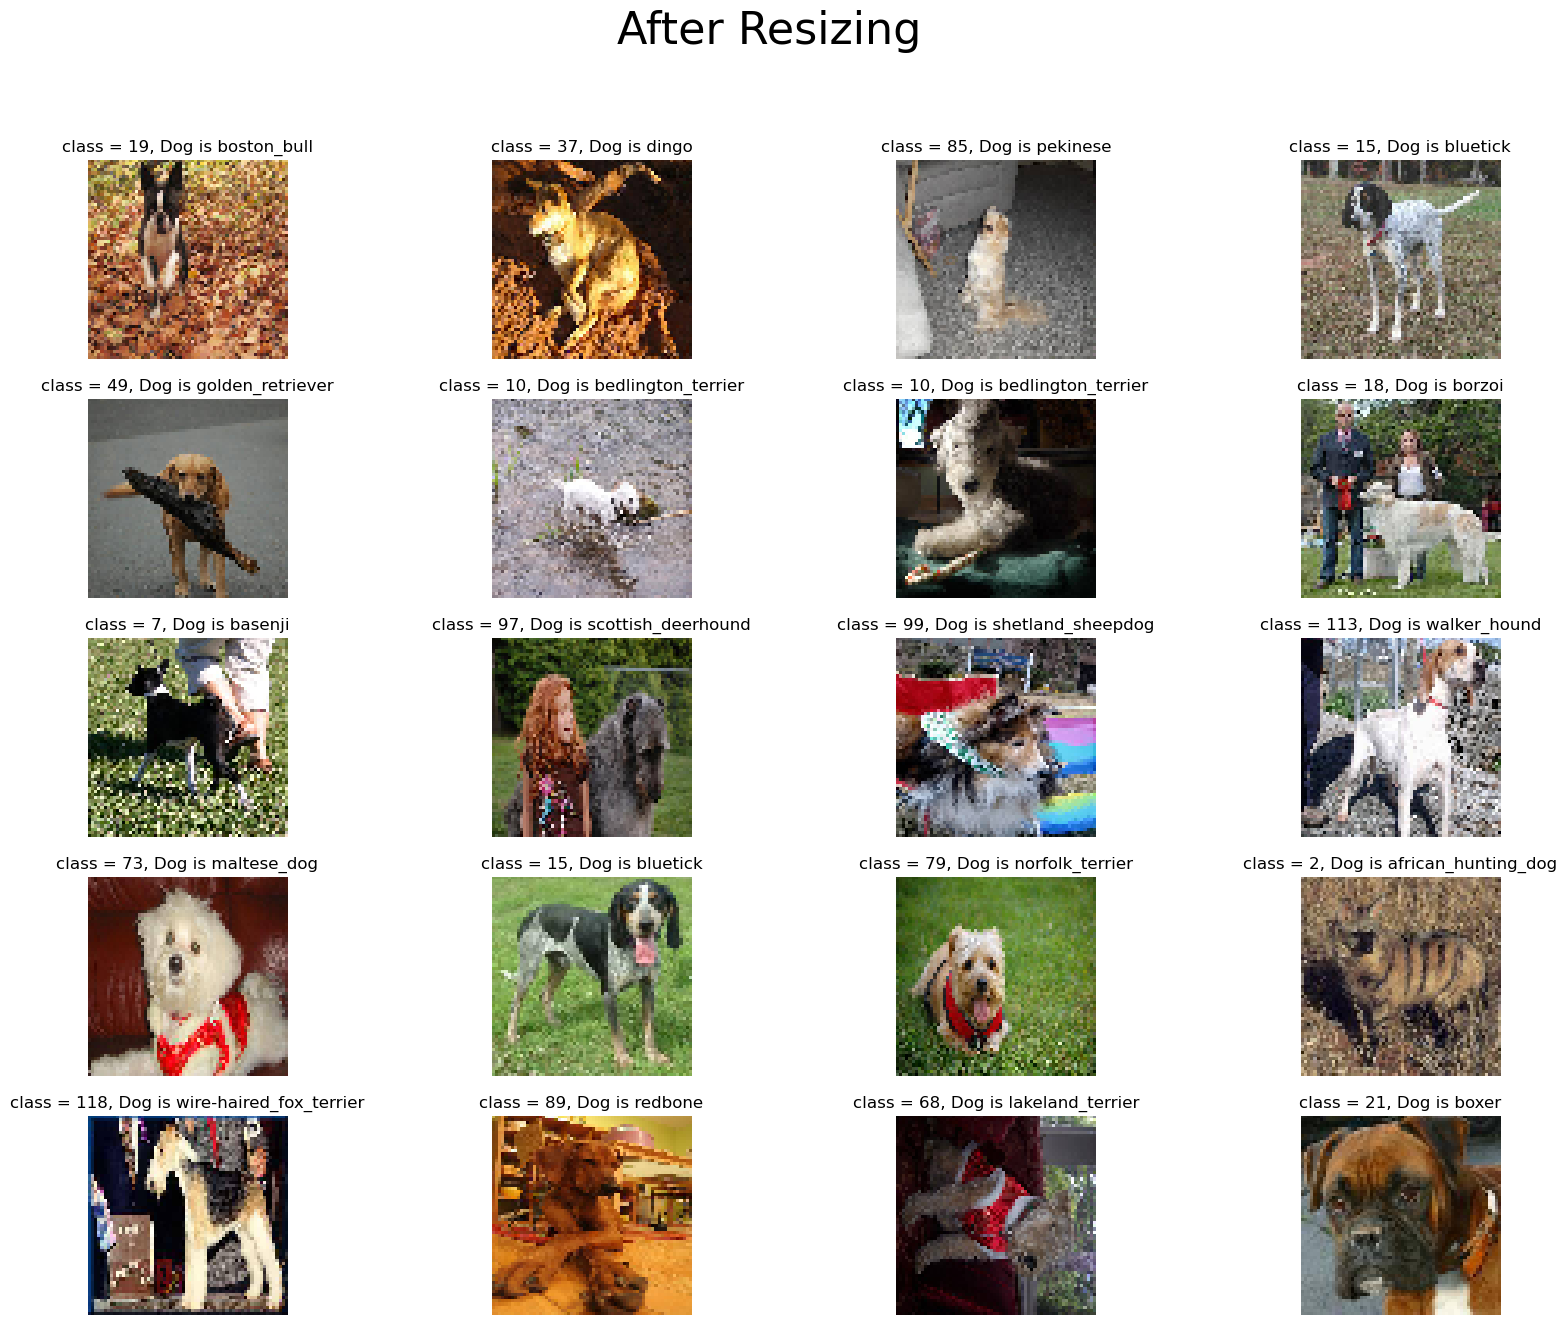

In [17]:
nrow = 5
ncol = 4  
fig1 = plt.figure(figsize=(20, 15))
fig1.suptitle('After Resizing', size=32)

for i in range(min(20, len(resized_image_list))):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(resized_image_list[i])
    plt.title('class = {x}, Dog is {y}'.format(x=train_df["label"].iloc[i], y=labels[i]))
    plt.axis('Off')
    plt.grid(False)
plt.show()

In [18]:
pip install keras

DATA Augmentation

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"), 
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.5)
], name='data_augmentation')

In [20]:
augmented_images = data_augmentation(resized_image_list)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


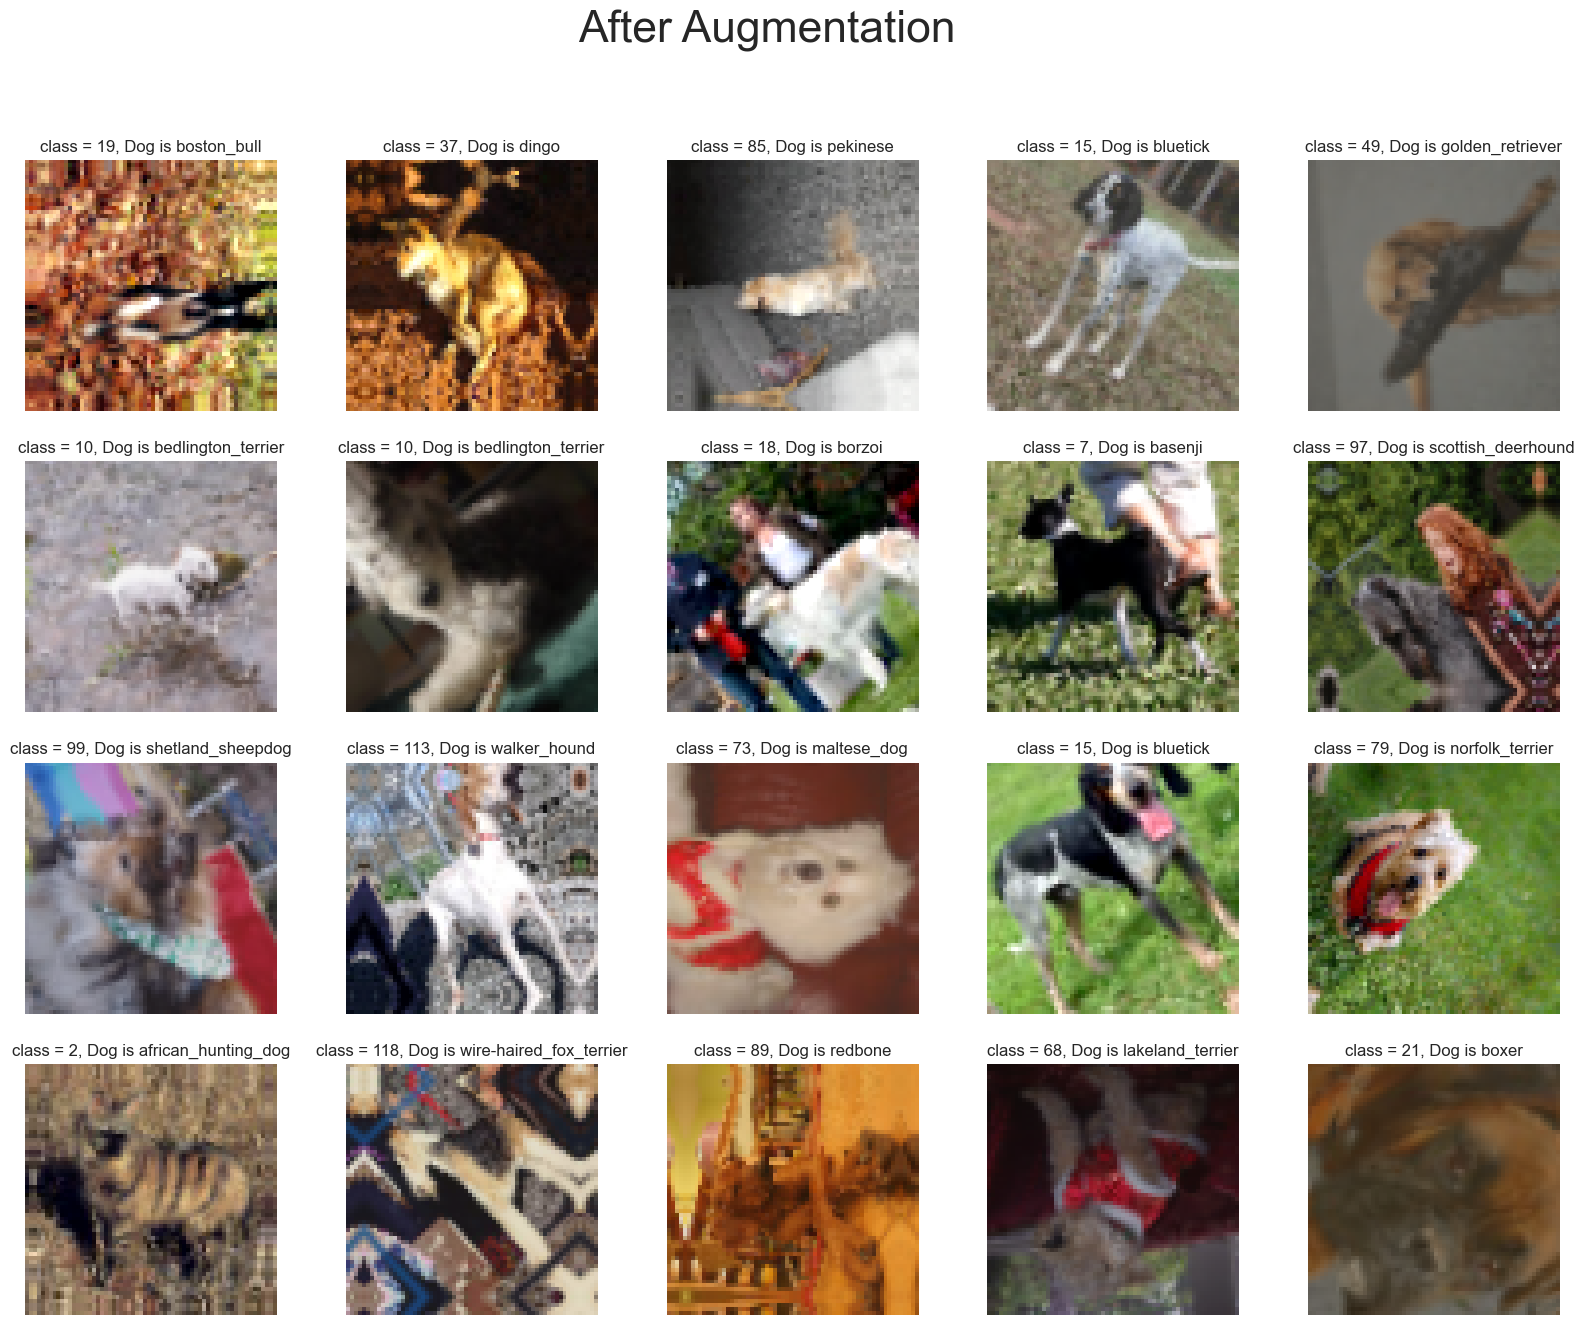

In [50]:
nrow = 4
ncol = 5

augmented_indices = range(min(20, len(resized_image_list)))

fig2 = plt.figure(figsize=(20, 15))
fig2.suptitle('After Augmentation', size=32)

for i, idx in enumerate(augmented_indices):
    augmented_image = data_augmentation(tf.expand_dims(resized_image_list[idx], 0), training=True)
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(augmented_image[0].numpy())
    plt.title('class = {x}, Dog is {y}'.format(x=train_df["label"].iloc[idx], y=labels[idx]))
    plt.axis('Off')
    plt.grid(False)

plt.show()